In [355]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import*
from pymatgen.electronic_structure import bandstructure 
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Markdown
def printGras(string):
    display(Markdown(string))

with MPRester("inU5O5NjJKENIfaZf6EO") as m:
    bandStruct = m.get_bandstructure_by_material_id("mp-20289") #Téléchargement de l'objet Band Structure
    

**Diagramme de la structure de bande**

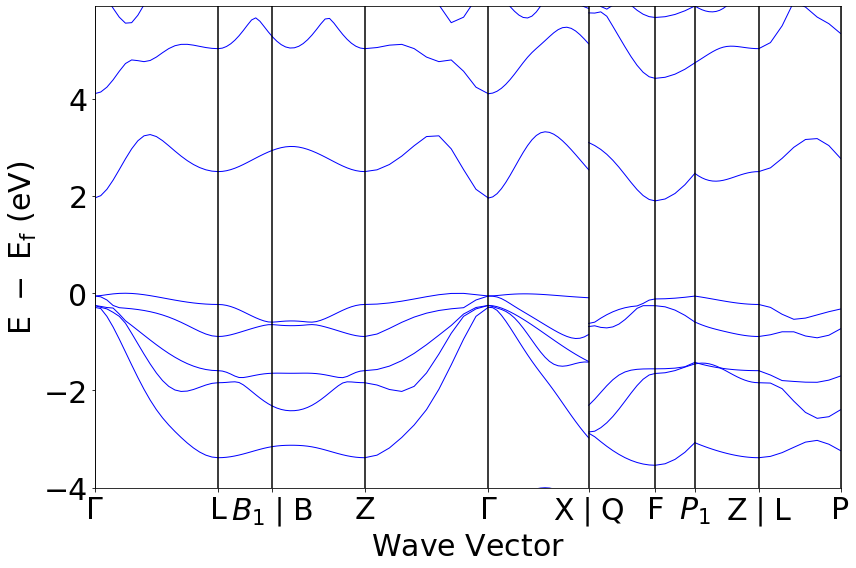

In [356]:
printGras("**Diagramme de la structure de bande**")

bandPlot=BSPlotter(bandStruct)
bandPlot.show()

In [357]:
printGras("***La bande interdite***")
bandGap=bandStruct.get_band_gap()
print("• Energie de la bande interdite:", bandGap["energy"], "[eV]")
if bandGap["direct"]==False:
    print("• La bande interdite est indirecte")
else:
    print("• La bande interdite est directe")
print("• Type de transition de la bande:", bandGap["transition"])
print('• Energie de Fermi : ', bandStruct.efermi,"[eV]\n")
print("L'énergie nécessaire pour franchir la bande interdite est de", bandGap.get("energy"), "[eV], ce matériau peut donc être utilisé comme semi-conducteur.")
print("La bande est indirecte car le maximum de la bande de valence (vbm) n’est pas associé au même vecteur d’onde que le minimum de la bande de conduction (cbm).")

***La bande interdite***

• Energie de la bande interdite: 1.9000999999999997 [eV]
• La bande interdite est indirecte
• Type de transition de la bande: (0.125,0.000,-0.000)-F
• Energie de Fermi :  3.4960842 [eV]

L'énergie nécessaire pour franchir la bande interdite est de 1.9000999999999997 [eV], ce matériau peut donc être utilisé comme semi-conducteur.
La bande est indirecte car le maximum de la bande de valence (vbm) n’est pas associé au même vecteur d’onde que le minimum de la bande de conduction (cbm).


In [358]:
printGras("***Recherche des directions où les dispersions sont maximales ou minimales***")
print("-----------------------------")
#1.Calculer les pentes pour chaque branche
#2.La dispersion est maximale (minimale) dans la branche où la pente est maximale (minimale) et suit la direction de cette pente

#Données sur la bande
data = bandPlot.bs_plot_data()
energy = data.get("energy")
distances = data.get("distances")
branche = ticks.get('distance')

#Energie du point 0 où E=Ef
E0=data.get('zero_energy') 

printGras("**1. Analyse de la dernière bande de valence**")
#print("La dernière bande de valence est :", energy[0].get('1')[15],"\n")
#Déterminer le vbm
vbm = bandStruct.get_vbm()
EVbm = vbm["energy"]
print("Energie du maximum de la bande de valence = ",EVbm,"[eV]\n")

print(vbm.get('band_index'))
print("La dernière bande de valence correspond à la 15ème bande")

printGras("**2. Analyse de la première bande de conduction**")
cbm = bandStruct.get_cbm()
ECbm = cbm["energy"]
print("Energie du minimum de la bande de valence = ", ECbm,"[eV]\n")
print(cbm.get('band_index'))
print("La première bande de conduction correspond à la 16ème bande")

***Recherche des directions où les dispersions sont maximales ou minimales***

-----------------------------


**1. Analyse de la dernière bande de valence**

Energie du maximum de la bande de valence =  3.4449 [eV]

defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})
La dernière bande de valence correspond à la 15ème bande


**2. Analyse de la première bande de conduction**

Energie du minimum de la bande de valence =  5.345 [eV]

defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
La première bande de conduction correspond à la 16ème bande


In [359]:
print("On sait que la dernière bande de valence correspond à la 15ème et la première bande de conduction à la 16ème. On va pouvoir calculer la pente de ces bandes dans chacune des branches.") 
def Pente(bande):
    Sol = np.zeros(9)
    for i in range(9):
        y = (energy[i]['1'][bande][-1]) - (energy[i]['1'][bande][0]) 
        x = (distances[i][-1]) - (distances[i][0])
        pente = y/x
        Sol[i] = pente
    return(Sol)
print("Pente des branches de la dernière bande de valence \n", Pente(15))
print("Pente des branches de la première bande de conduction \n", Pente(16))

On sait que la dernière bande de valence correspond à la 15ème et la première bande de conduction à la 16ème. On va pouvoir calculer la pente de ces bandes dans chacune des branches.
Pente des branches de la dernière bande de valence 
 [-0.18318244 -0.87050651  0.51159034  0.18318242 -0.04706031  0.98211628
  0.19215555 -0.34978156 -0.14876706]
Pente des branches de la première bande de conduction 
 [ 0.57000584  1.04566066 -0.61438652 -0.57011071  0.75076712 -2.33937485
  1.84757401  0.07633074  0.43393036]


In [388]:
def Pente(bande):
    Sol = np.zeros(9)
    for i in range(9):
        y = (bandPlot.bs_plot_data()['energy'][i]['1'][bande][-1]) - (bandPlot.bs_plot_data()['energy'][i]['1'][bande][0]) 
        x = (bandPlot.bs_plot_data()['distances'][i][-1]) - (bandPlot.bs_plot_data()['distances'][i][0])
        pente = y/x
        Sol[i] = pente
    return(Sol)
print("Pente des branches de la dernière bande de valence :\n", Pente(15))
print("Pente des branches de la première bande de conduction : \n", Pente(16))
#Pentes max et min
penteMax_BandVal = np.amax(abs(Pente(15)))
penteMin_BandVal = np.amin(abs(Pente(15)))
penteMax_BandCond = np.amax(abs(Pente(16)))
penteMin_BandCond = np.amin(abs(Pente(16)))

print()
print("penteMax_BandValence :",penteMax_BandVal, "sur la 6ème branche")
print("penteMin_BandValence :",penteMin_BandVal, "sur la 5ème branche")
print("penteMax_BandConduction :",penteMax_BandCond, "sur la 6ème branche")
print("penteMin_BandConduction:",penteMin_BandCond, "sur la 8ème branche")

Pente des branches de la dernière bande de valence :
 [-0.18318244 -0.87050651  0.51159034  0.18318242 -0.04706031  0.98211628
  0.19215555 -0.34978156 -0.14876706]
Pente des branches de la première bande de conduction : 
 [ 0.57000584  1.04566066 -0.61438652 -0.57011071  0.75076712 -2.33937485
  1.84757401  0.07633074  0.43393036]

penteMax_BandValence : 0.9821162811542409 sur la 6ème branche
penteMin_BandValence : 0.04706031189042864 sur la 5ème branche
penteMax_BandConduction : 2.3393748543356327 sur la 6ème branche
penteMin_BandConduction: 0.07633074049358636 sur la 8ème branche


Les flèches vertes indiquent la direction où la dispersion est minimale et les flèches rouges indiquent la direction où la dispersion est maximale dans la dernière bande de valence et dans la première bande de conduction


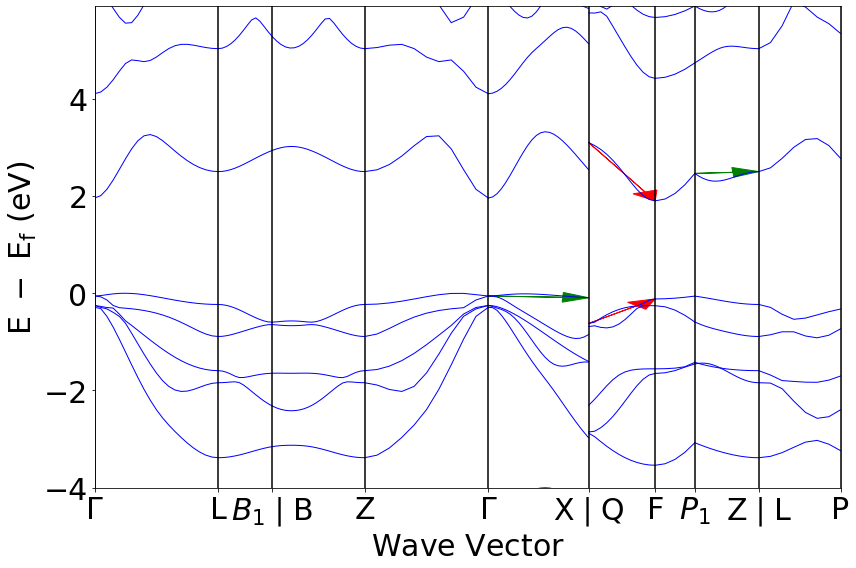

In [389]:
#flèches représentant les dispersions max et min des bandes de valence et de conduction
bandPlot.get_plot()
plt.arrow(distances[5][0], energy[5]["1"][15][0], (distances[6][0])-(distances[5][0]), energy[5]["1"][15][len(energy[5].get('1')[15])-1] - (energy[5].get('1')[15])[0], head_width=0.2, head_length=0.2, fc='red', ec='red',length_includes_head=True)

plt.arrow(distances[4][0], energy[4]["1"][15][0], (distances[5][0])-(distances[4][0]), energy[4]["1"][15][len(energy[4].get('1')[15])-1] - (energy[4].get('1')[15])[0], head_width=0.2, head_length=0.2, fc='green', ec='green',length_includes_head=True)

plt.arrow(distances[5][0], energy[5]["1"][16][0], (distances[6][0])-(distances[5][0]) , energy[5]["1"][16][len(energy[5].get('1')[16])-1] - (energy[5].get('1')[16])[0], head_width=0.2, head_length=0.2, fc='red', ec='red',length_includes_head=True)
plt.arrow(distances[7][0], energy[7]["1"][16][0], (distances[8][0])-(distances[7][0]) , energy[7]["1"][16][len(energy[7].get('1')[16])-1] - (energy[7].get('1')[16])[0], head_width=0.2, head_length=0.2, fc='green', ec='green',length_includes_head=True)

print("Les flèches vertes indiquent la direction où la dispersion est minimale et les flèches rouges indiquent la direction où la dispersion est maximale dans la dernière bande de valence et dans la première bande de conduction")

In [390]:
printGras("***La masse effective***")
print("En supposant une dispersion parabolique, la formule pour déterminer la masse effective est  m* = (ħ²k²)/2E(k)")
print()
hBar = 6.582119569e-16 # en eVs  
EVbm = vbm["energy"]
ECbm = cbm["energy"]
kVbm = vbm["kpoint"].cart_coords
kCbm = cbm["kpoint"].cart_coords
mEffVbm = ((hBar**2)*(kVbm[0]**2+kVbm[1]**2+kVbm[2]**2))/(2*EVbm)
mEffCbm = ((hBar**2)*(kCbm[0]**2+kCbm[1]**2+kCbm[2]**2))/(2*ECbm)
print("• La masse effective au sommet de la dernière bande de valence vaut m* =", mEffVbm, "[kg] \n")
print("• La masse effective à la base de la première bande de conduction vaut m* =", mEffCbm, "[kg] \n")


***La masse effective***

En supposant une dispersion parabolique, la formule pour déterminer la masse effective est  m* = (ħ²k²)/2E(k)

• La masse effective au sommet de la dernière bande de valence vaut m* = 3.570472803123165e-33 [kg] 

• La masse effective à la base de la première bande de conduction vaut m* = 3.978769931044132e-32 [kg] 

